In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout


In [60]:
import yfinance as yf
import os

In [2]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/24/db/6ec78a4f10673a641cdb11694c2de2f64aa00e838551248cb11b8b057440/matplotlib-3.8.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/5b/ac/26fa1057f62beaa2af4c55c6ac733b114a403b746cfe0ce3dc6e4aec921a/contourpy-1.2.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/1a/26/837f5e58e90f53eab27acf30fc878a933d8ca8e35e1f2f82f9b39385f830/fonttools-4.49.0-cp311-cp311-macosx_10_9_universal2.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 759.9 kB/s eta 0:00:00a 0:00:01
  Obtaining dependency 

In [2]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/24/db/6ec78a4f10673a641cdb11694c2de2f64aa00e838551248cb11b8b057440/matplotlib-3.8.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/5b/ac/26fa1057f62beaa2af4c55c6ac733b114a403b746cfe0ce3dc6e4aec921a/contourpy-1.2.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/1a/26/837f5e58e90f53eab27acf30fc878a933d8ca8e35e1f2f82f9b39385f830/fonttools-4.49.0-cp311-cp311-macosx_10_9_universal2.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 759.9 kB/s eta 0:00:00a 0:00:01
  Obtaining dependency 

In [59]:
pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/14/03/3c854ca3e02eedf614abba4b2e177c469bf3af58207fa30d5098c5d652fe/yfinance-0.2.37-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for lxml>=4.9.1 from https://files.pythonhosted.org/packages/bc/7e/4c66526e9b4f9c46afd7b2fef4482857d38752f2ee7cbb218816c5468251/lxml-5.1.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for appdirs>=1.4.4 from https://files.pythonhosted.org/packages/3b/00/2344469e2084fb287c2e0b57b72910309874c3245463acd6cf5e3db69324/appdirs-1.4.4-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.6/314.6 kB 9.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to bu

In [14]:
from sklearn.metrics import precision_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier 


In [61]:
sp500 = pd.read_csv('/Users/riyajoshi/Downloads/sp500.csv')
sp500

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0,0
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0,0
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0,0
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...,...
18287,2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,2209800080,0,0
18288,2022-09-07,3909.429932,3987.889893,3906.030029,3979.870117,0,0,0
18289,2022-09-08,3959.939941,4010.500000,3944.810059,4006.179932,0,0,0
18290,2022-09-09,4022.939941,4076.810059,4022.939941,4067.360107,0,0,0


In [62]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500["Tomorrow"]

0          16.850000
1          16.930000
2          16.980000
3          17.080000
4          17.030001
            ...     
18287    3979.870117
18288    4006.179932
18289    4067.360107
18290    4107.279785
18291            NaN
Name: Tomorrow, Length: 18292, dtype: float64

In [30]:
sp500['Target'] = (sp500['adjClose'].shift(-1) > sp500['adjClose']).astype(int)

# Verify the 'Target' column has been created
print(sp500[['adjOpen', 'adjClose', 'Target']].head())

   adjOpen  adjClose  Target
0   716.48    718.27       1
1   719.00    718.92       0
2   714.91    710.36       0
3   708.65    691.72       1
4   698.77    693.71       1


In [64]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int) # 1 if tomorrow's value > today's values else 0 

In [66]:
# n_estimators: no of decision trees
# min_sample_split: prevents overfitting (if too high less accurate if too low overfitting)
# random_state: setting to 1, will keep the randomness same upon rerurring data
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [78]:
## Check Accuracy using Precision Score 
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.6470588235294118

<Axes: >

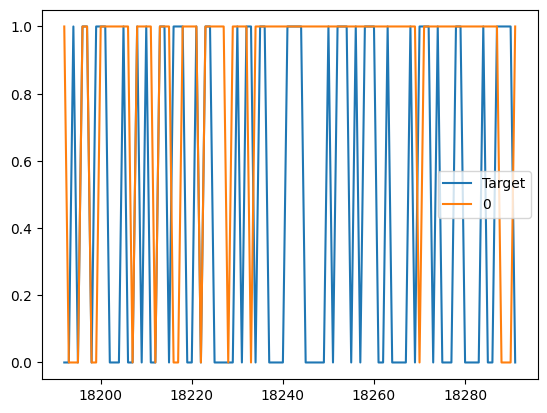

In [72]:
## Plot Actual values with predicted Values" 
# blue: actual
# orange: predictions 
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [73]:
# Create Prediction Function 
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions") # combines model into series called Predictions
    combined = pd.concat([test["Target"], preds], axis=1) # combine data
    return combined

In [80]:
# Backtest Functin l
# Trading year: 250 days
# Step: train each year 
# Start at 10th year, use 10th year data to predict 11th year data 
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)


In [82]:
predictions = backtest(sp500, model, predictors)
print(predictions)

       Target  Predictions
2500        0            1
2501        1            1
2502        1            1
2503        0            0
2504        0            0
...       ...          ...
18287       1            0
18288       1            0
18289       1            0
18290       1            0
18291       0            1

[15792 rows x 2 columns]


In [76]:
predictions["Predictions"].value_counts()

Predictions
0    9070
1    6722
Name: count, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]

In [ ]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [ ]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])

In [40]:
preds = model.predict(test[predictors])

combined = pd.DataFrame(dict(actual=test["Target"], prediction=preds))

# Corrected code for creating the crosstab/confusion matrix
confusion_matrix = pd.crosstab(index=combined["actual"], columns=combined["prediction"], rownames=['Actual'], colnames=['Predicted'])

# Display the confusion matrix
print(confusion_matrix)

Predicted  0   1
Actual          
0          0  41
1          2  57


In [55]:
def predict(data, model, predictors):
    # Assuming 'train' and 'test' are defined globally or passed as arguments is a bad practice
    # However, for the sake of this example, it's left as is
    model.fit(data[predictors], data["Target"])
    preds = model.predict(data[predictors])
    combined = pd.DataFrame({'Actual': data["Target"], 'Predicted': preds})
    return combined


# Backtesting means we train the algorithm on data from a certain time period
# and then test its performance on older data

def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[:i]
        test = data.iloc[i:i+step] if i+step < data.shape[0] else data.iloc[i:]

        if test.empty:
            break

        
        combined = predict(test, model, predictors)
        all_predictions.append(combined)
        
    return pd.concat(all_predictions)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Run the backtest
predictions = backtest(sp500, model, predictors, start=2, step=1)  # Adjust start and step for your dataset

# Optionally, evaluate the model's performance
accuracy = accuracy_score(predictions['Target'], predictions['Predicted'])
print(f"Accuracy: {accuracy:.2f}")

In [ ]:
accuracy = accuracy_score(predictions['Target'], predictions['Predicted'])
print(f"Accuracy: {accuracy:.2f}")

In [54]:
def predict(train, test, model, predictors):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    test['Predicted'] = preds  # Add predictions to the test set
    return test